# Proyecto 04 - Procesamiento del Lenguaje Natural

## Dataset: Women's E-Commerce Clothing Reviews

**El dataset se puede descargar [aquí](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews).  La licencia corresponde a [CC0](https://creativecommons.org/publicdomain/zero/1.0/).**

### Exploración de datos y Procesamiento del Lenguaje Natural

Este dataset tiene una gran variedad de caminos que se pueden explorar y un gran número de rpeguntas que se pueden responder. Lo que se buscará abordar aquí es la predicción de si una prenda será recomendada por su compradora o no, reduciendo el problema a una clasificación binaria: "recomendada" y "no recomendada".

Se explorarán los datos para concer qué variables están fuertemente correlacionadas y pueden servir para predecir lo previamente expuesto.

### Motivación
Una buena estrategia de marketing es la publicidad que hacen los clientes satisfechos, ya que garantizan entre sus conocidos que el producto es bueno. Por tanto, se considera como una motivación para este proyecto tratar de predecir si un cliente recomendará un producto a potenciales nuevos clientes.

No es relevante la puntuación que le da por sí misma, sino en cuanto nos permite conocer, junto a otras variables, si ese producto fue lo suficientemente bueno para el usuario que éste lo recomiende a otros.

## Objetivo del Proyecto
Implementar un modelo para predecir si un usuario recomendará una prenda a partir de su reseña y otros atributos.

## Desarrollo
- Link al repositorio de GitHub con la resolución completa: <https://github.com/lusalmeron/Acamica-DS-Proyecto-4>

#### Importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Garbage collector para optimizar recursos
import gc

In [2]:
# Clase para personalizar las impresiones de consola
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#### Importamos el dataset

In [3]:
data = pd.read_csv("data/Womens_Clothing_Reviews.csv")
print("- Cantidad de filas del set:" + color.YELLOW, data.shape[0],color.END)
print("- Cantidad de atributos (columnas) del dataset:" + color.CYAN, data.shape[1],color.END)

- Cantidad de filas del set: 23486 
- Cantidad de atributos (columnas) del dataset: 11 


Exploramos el dataset para entender los datos:

In [6]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [7]:
data.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
# Porcentaje de nulos por columna
data.isna().sum()*100/data.shape[0]

Unnamed: 0                  0.000000
Clothing ID                 0.000000
Age                         0.000000
Title                      16.222430
Review Text                 3.597888
Rating                      0.000000
Recommended IND             0.000000
Positive Feedback Count     0.000000
Division Name               0.059610
Department Name             0.059610
Class Name                  0.059610
dtype: float64

#### Transformaciones

In [4]:
# Descartamos columna de índice 'Unnamed'
data.drop(columns=['Unnamed: 0'], inplace=True)
data.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [5]:
# Renombramos para mayor facilidad de uso
mapper = {'Clothing ID':'clothing_id', 'Age':'usr_age', 'Title':'review_title', 'Review Text':'review_body', 'Rating':'rating',
       'Recommended IND':'recommended', 'Positive Feedback Count':'pos_feedback_count', 'Division Name':'div_name',
       'Department Name':'dept_name', 'Class Name':'class_name'}
data.rename(columns=mapper,inplace=True)
data.columns

Index(['clothing_id', 'usr_age', 'review_title', 'review_body', 'rating',
       'recommended', 'pos_feedback_count', 'div_name', 'dept_name',
       'class_name'],
      dtype='object')

In [24]:
# Hay reviews con caracteres decodificados
## &quot; == "
## &#39; == '
## &amp;quot;
## &amp;#39; == ´
## &amp;amp;#39;
## &amp;amp;amp;#39; == ´
## &amp;amp;amp;amp;#39; == '' 
## &amp;amp;amp;amp;quot; == '
import string
idxs = df[df.review_body.str.contains('&amp')].index
for idx in idxs:
    print(idx,' - ',df.review_body.iloc[idx],'\n')

256  -  Love the look and quality of this jacket. i&amp;#39;d say it fits true to size but it is way too short for me (i&amp;#39;m just under 6&amp;#39; tall). wish these came in tall sizes! 

484  -  Is not a place i want to be, even if the style of a sweater is great.  yes, this sweater is very cropped, but i think it&amp;#39;s definitely intended to be worn off the shoulder to drop the waist a bit.  it&amp;#39;s the itchiness that makes it an immediate &amp;quot;no&amp;quot;, and that&amp;#39;s coming from someone who has serious fiber itch tolerance. 

2420  -  Very comfortable to wear. you can wear it any season.  it runs true to size.  nice fabric.  it&amp;#39;s a simple black dress.  love it! 

2586  -  This coat is super cute and flattering. i am 5&amp;amp;amp;amp;#39;8&amp;amp;amp;amp;quot; and it comes almost to my knee on the back. i&amp;amp;amp;amp;#39;m usually a small but got the medium in case i wear a bulky sweater underneath. comfy and warm, but won&amp;amp;amp;#39;t b

In [11]:
print(data.shape[0])
df  = data.copy()
df.fillna(value={'review_title':"-"}, inplace=True)
df = df.dropna()
df.reset_index(drop=True, inplace=True)
print(df.shape[0])

23486
22628


#### Importamos librerías SpaCy y NLTK

Para el tratamiento de texto, las librerías que nos brindan las herramientas adecuadas son **SpaCy** y **NLTK**. Dependiendo de lo que se quiera hacer, utilizaremos una o la otra.

In [3]:
# Previamente
## python -m spacy download en_core_web_md
import spacy # https://spacy.io/usage/models
nlp = spacy.load('en_core_web_md')

#Stop Words de en_core_news_md
from spacy.lang.en.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)

In [4]:
import nltk

#Stop Words de nltk
from nltk.corpus import stopwords
stopwords_nltk = set(stopwords.words('english'))

# Quitamos de las stopwords la palabra 'no', que nos puede ser últil para predecir
#stopwords_nltk.remove('no')

In [5]:
# Para manejo de resgitros de texto
import re
from nltk.tokenize import RegexpTokenizer

#Constante de signos de puntuación
import string
puntua = string.punctuation + '#...'
excluded_pos = ['SCONJ','CCONJ','NUM','PUNCT','PRON','DET','ADP','AUX','X','PROPN']

## Análisis Exploratorio de Datos
#### Algunas preguntas que van surgiendo...
#### 1. ¿Qué clases de productos hay en el dataset?

In [15]:
data.class_name.value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: class_name, dtype: int64

#### 2. ¿Cuántas reseñas hay por cada valoración (1-5) según la categoría?

In [16]:
data_grouped = data.clothing_id.groupby([data['class_name'],data['rating']]).count().astype(int).reset_index(name='count')
data_grouped

,class_name,rating,count
0,Blouses,1,119
1,Blouses,2,229
2,Blouses,3,394
3,Blouses,4,669
4,Blouses,5,1686
...,...,...,...
88,Trend,1,11
89,Trend,2,11
90,Trend,3,19
91,Trend,4,26


##### Visualización

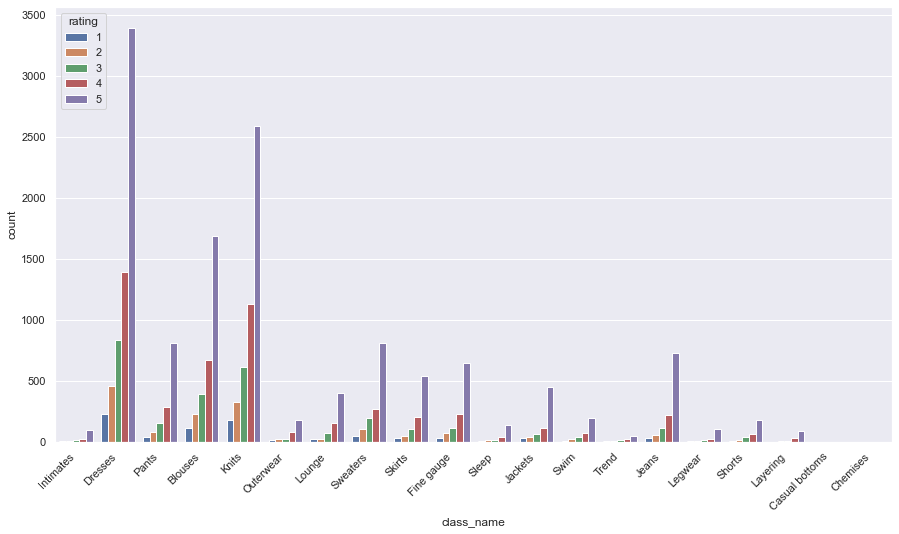

In [22]:
# Visualización
plt.figure(figsize=(15,8))
grafico = sns.countplot(x=data['class_name'],data=data, hue='rating')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()

#### 3. ¿Cuál es el promedio de rating por cada clase? <br>
*La media debería dar alrededor de 3, pero aquellos que estén por debajo significa que fueron en su mayoría peor calificados. Inversamente sucede con los que están por encima de 3, lo que significa que fueron en su mayoría muy bien calificados.*

In [23]:
# Promedio de estrellas por categoría ordenados de forma ascendente
from statistics import mean
data_grouped = data.rating.groupby([data['class_name']]).mean().reset_index(name='avg_rating')
data_grouped['rev_count'] = data.rating.groupby([data['class_name']]).count().astype(int).reset_index(name='rev_count').rev_count
data_grouped.sort_values(by='avg_rating')

,class_name,avg_rating,rev_count
19,Trend,3.815126,119
2,Chemises,4.000000,1
3,Dresses,4.150815,6319
0,Blouses,4.154020,3097
8,Knits,4.161677,4843
17,Sweaters,4.179272,1428
18,Swim,4.197143,350
12,Outerwear,4.198171,328
15,Skirts,4.245503,945
14,Shorts,4.255521,317


##### Visualización

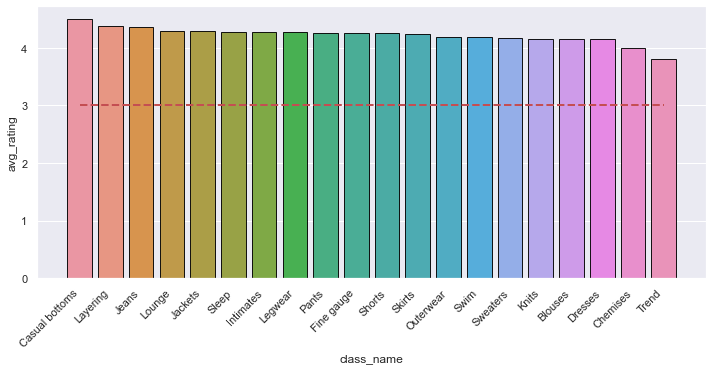

In [24]:
# Visualización de valoración promedio por categoría
data_grouped.sort_values(['avg_rating','rev_count'],ascending=False,inplace=True)
cte = np.ones(data_grouped.shape[0])*3 # Valor medio
plt.figure(figsize=(12,5))
grafico = sns.barplot(x=data_grouped.class_name, y=data_grouped.avg_rating, linewidth=0.9,edgecolor=(0,0,0))
plt.plot(cte, ls = '--', lw = 2, c='r',label = 'Valoración media')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()

#### 4. ¿Cuántas reseñas hay por cada clase? <br>
*Esto nos permitirá dar contexto a los promedios previamente obtenidos.*

<AxesSubplot:title={'center':'Cantidad de reviews por clase'}, xlabel='Clase', ylabel='Cantidad de reseñas'>

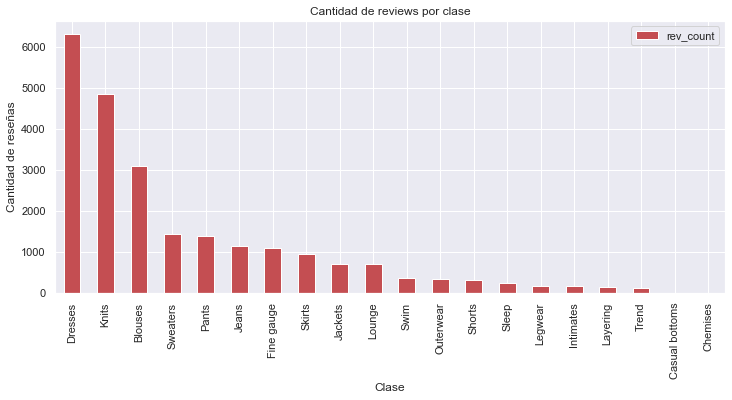

In [25]:
data_grouped.sort_values(by='rev_count',ascending=False).plot(x='class_name',y='rev_count',kind='bar',figsize=(12,5),title='Cantidad de reviews por clase', xlabel='Clase', ylabel='Cantidad de reseñas', color= 'r')

*Vemos que, aunque 'Casual Bottoms' es la que tiene mayor promedio, es una de las últimas en cantidad de reseñas. Por otro lado, 'Dresses', que aún siendo alto es uno de los promedios más bajos, es la que tiene la máxima cantidad de reseñas.*

#### 5. ¿Cuántas reviews hay por cada rating?

In [26]:
data.rating.value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: rating, dtype: int64

*Vemos que no está equilibrado por cada valoración posible. Hay 15 veces más ratings de 5 que 1.*

#### 6. ¿Cuántas reseñas son de prendas recomendadas? 

In [27]:
data_recom = data.clothing_id.groupby([data['class_name'],data['recommended']]).count().astype(int).reset_index(name='count')
data_recom

,class_name,recommended,count
0,Blouses,0,588
1,Blouses,1,2509
2,Casual bottoms,1,2
3,Chemises,1,1
4,Dresses,0,1212
5,Dresses,1,5107
6,Fine gauge,0,179
7,Fine gauge,1,921
8,Intimates,0,22
9,Intimates,1,132


##### Visualización

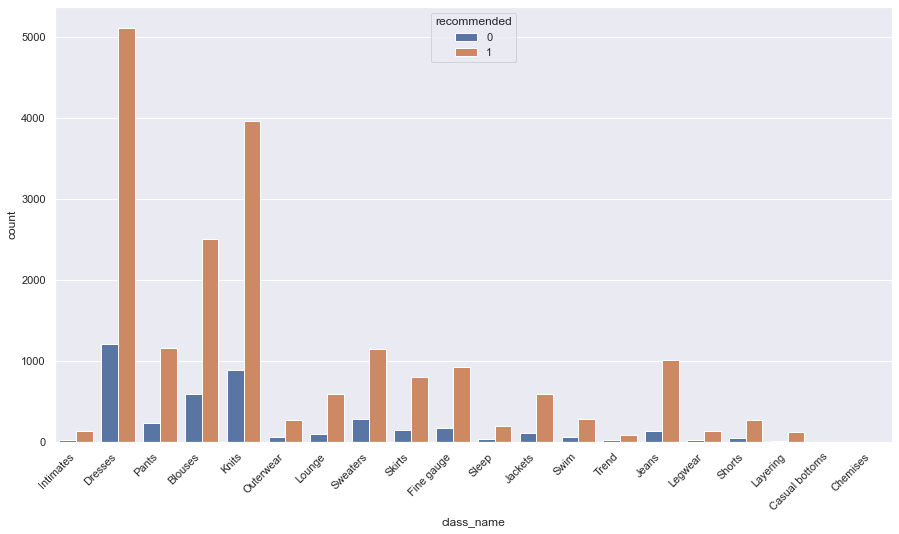

In [28]:
# Visualización
plt.figure(figsize=(15,8))
grafico = sns.countplot(x=data['class_name'],data=data, hue='recommended')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()

#### 7. ¿Cuántas reseñas hay por cada clase "recomendada"(1) "no recomendada"(0)? <br>

1    19314
0     4172
Name: recommended, dtype: int64

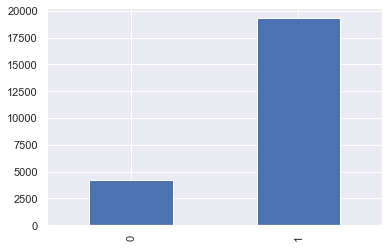

In [34]:
data.recommended.value_counts().plot(kind='bar')
data.recommended.value_counts()

#### 8. ¿Edad máxima y mínima de los usuarios que publicaron en este dataset?

In [43]:
max_age = data.usr_age.max()
print("- " + color.RED + "Máxima" + color.END + " edad:", max_age, "años")
data[data.usr_age == max_age]
#print("En total escribieron" + color.BOLD, unique_usrs, color.END + "usuarios únicos de las" + color.BOLD, data.shape[0],color.END + "reseñas existentes.")
#print("Esto equivale al" + color.CYAN, unique_usrs*100//data.shape[0], "%" + color.END)

Máxima edad: 99 años


,clothing_id,age,review_title,review_body,rating,recommended,pos_feedback_count,div_name,dept_name,class_name
8327,1078,99,Beachy and boho!,I love the weight of the material; sometimes c...,5,1,1,General,Dresses,Dresses
11545,949,99,NaN,"Great quality, i didn't expect the neck to be ...",4,1,4,General,Tops,Sweaters


*Es raro pensar que una persona de 99 años hizo una compra de E-Commerce. Podría ser un error.*

Vemos si hay usuarios de más de 70 años:

In [50]:
print("- Cantidad de usuarios mayores a 70 años:",data[data.usr_age >=70].shape[0])

- Cantidad de usuarios mayores a 70 años: 473


In [51]:
min_age = data.usr_age.min()
print("- " + color.BLUE + "Mínima" + color.END + " edad:", min_age, "años")
data[data.usr_age == min_age]

- Mínima edad: 18 años


,clothing_id,age,review_title,review_body,rating,recommended,pos_feedback_count,div_name,dept_name,class_name
8858,1094,18,Love,I bought this dress for my engagement photo sh...,5,1,0,General,Dresses,Dresses
19704,1008,18,Stunning,This skirt is absolutely beautiful and is a go...,5,1,1,General,Bottoms,Skirts
22364,1072,18,I get so many compliments,I found this dress on sale in store and i usua...,4,1,0,General,Dresses,Dresses
22390,868,18,"A little big, but so comfortable!",This shirt is incredibly comfortable. the mate...,4,1,0,General,Tops,Knits


#### 9. ¿Cuántos productos únicos aparecen en las reseñas?

In [52]:
# Ver sobre cuántos productos únicos se publicaron reseñas
unique_prods = len(data.clothing_id.unique())
print("De las" + color.BOLD, data.shape[0],color.END + "reseñas, se mencionan" + color.BOLD, unique_prods , color.END + "productos únicos.")
print("Esto equivale al" + color.CYAN, unique_prods*100//data.shape[0], "%" + color.END)

De las 23486 reseñas, se mencionan 1206 productos únicos.
Esto equivale al 5 %


#### 10. Tomamos como ejemplo una prenda y analizamos si fue recomendada o no y su rating

In [12]:
rand_idx = np.random.randint(0,data.shape[0])
item = data.clothing_id.iloc[rand_idx]
item_data = data[data.clothing_id == item]
print("Tipo de la prenda" + color.BOLD, item,color.END + ":",  data.class_name.iloc[rand_idx])
print("Cantidad de reseñas de la prenda" + color.BOLD, item,color.END + ":", len(item_data))
print("Promedio de rating que ha recibido:" + color.YELLOW, item_data.rating.mean(),color.END)
item_data[['clothing_id','class_name','review_title','review_body','rating']].reset_index(drop = True, inplace=True)

Tipo de la prenda 720 : Lounge
Cantidad de reseñas de la prenda 720 : 5
Promedio de rating que ha recibido: 4.8 


In [13]:
print(color.BOLD + "Título:" + color.END,item_data.review_title.iloc[0])
print(color.BOLD + "Reseña:" + color.END,item_data.review_body.iloc[0])
print(color.BOLD + "Rating:" + color.END,item_data.rating.iloc[0])
if (item_data.recommended.iloc[0]):
    print(color.BOLD + "Categoría:" + color.END + "Recomendado")
else:
    print(color.BOLD + "Categoría:" + color.END + "No recomendado")

Título: nan
Reseña: I love this dress. it is so soft and comfortable, perfect for summer!! i wish it came in more colors because i would buy everyone!!
Rating: 5
Categoría:Recomendado


In [7]:
# pip install wordcloud --> HAY ERROR!!
from wordcloud import WordCloud
if(item_data.review_title.iloc[0].isna()):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords_nltk).generate(item_data.review_body.iloc[0])
else:
    wordcloud = WordCloud(background_color='white',stopwords=stopwords_nltk).generate(item_data.review_title.iloc[0] + ' ' + item_data.review_body.iloc[0])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

'\nif(item_data.review_title.iloc[0].isna()):\n    wordcloud = WordCloud(background_color=\'white\',stopwords=stopwords_nltk).generate(item_data.review_body.iloc[0])\nelse:\n    wordcloud = WordCloud(background_color=\'white\',stopwords=stopwords_nltk).generate(item_data.review_title.iloc[0] + \' \' + item_data.review_body.iloc[0])\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.show()\n'

*Con una review a veces no es tan eficiente el Wordcloud para visualizar ya que puede no haber palabras repetidas. Buscamos entonces juntar más reviews de un mismo tipo "Recomendado" y "No recomendado"*.

#### 11. ¿Cuáles son las palabras más frecuentes por cada clase?
Para responder a esto utilizmos la librería spaCy para el procesamiento del lenguaje natural.

In [64]:
# Separamos en distintos dataframes las reviews según valoración
data_recom = data[data['recommended']==1]
data_not_recom = data[data['recommended']==0]

<span style='color:purple;'>**Empezamos analizando las reviews "Recomendadas":**</span>
<br> Vamos a quedarnos sólo con los adjetivos para mejorar la visualización. <br>(5 min)

In [67]:
todas_reviews_recom = []
for i in data_recom.index:
    review1 = data_recom.review_body[i] #seleccionar el titular
    sent = nlp(str(review1))
    for token in sent:
        if (token.pos_ == "ADJ" and token.text not in stopwords_spacy and len(token.text)>2):
            temp = token.lemma_
            todas_reviews_recom.append(temp.lower()) #agregar el resultado a la lista

print('- Cantidad de palabras filtradas:' + color.BOLD,len(todas_reviews_recom), color.END)
todas_reviews_recom[:3]

- Cantidad de palabras filtradas: 116527 


['wonderful', 'silky', 'sexy']

In [68]:
# Obtenemos frecuencia de palabras y creamos nuevo df
freq_rev_recom = nltk.FreqDist(todas_reviews_recom)
df_rev_frec_recom = pd.DataFrame(freq_rev_recom.items(), columns = ['Palabra', 'Frecuencia']) 
df_rev_frec_recom.sort_values(by=['Frecuencia'], inplace=True, ascending=False)
df_rev_frec_recom.reset_index(drop = True, inplace=True)
df_rev_frec_recom.head()

,Palabra,Frecuencia
0,great,5545
1,small,3815
2,perfect,3461
3,little,3232
4,soft,3135


In [71]:
# Vemos la parte inferior
df_rev_frec_recom[df_rev_frec_recom['Frecuencia']<3]

,Palabra,Frecuencia
1118,loving,2
1119,determined,2
1120,eggplant,2
1121,unbelted,2
1122,whitish,2
...,...,...
2698,washing,1
2699,shrank,1
2700,cheezy,1
2701,free-,1


##### Visualizamos la frecuencia de las palabras en las reviews "Recomendadas"

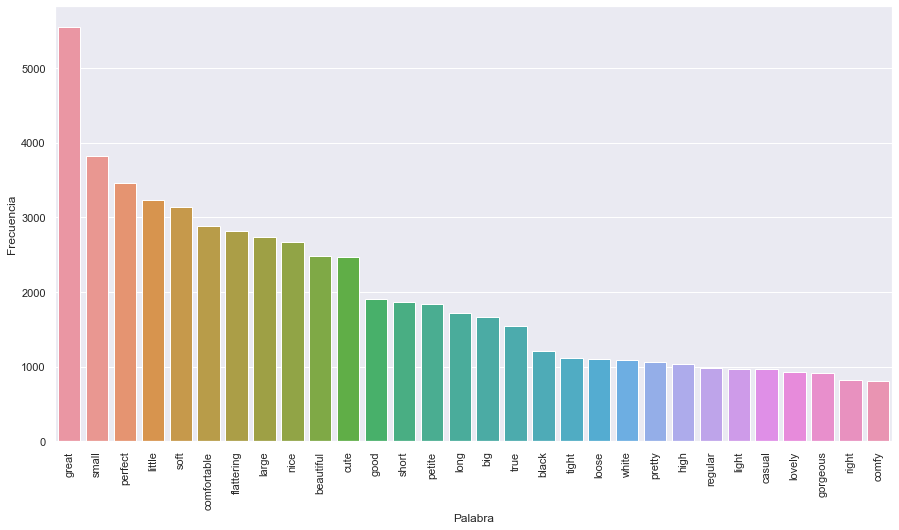

In [72]:
# Generamos gráfico con valores
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_recom.iloc[:30].Palabra, y = df_rev_frec_recom.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

In [8]:
from wordcloud import WordCloud

# Definimos función para ver el wordcloud de una lista de palabras
def ver_wordcloud(palabras):
    text = ' '.join(palabras)
    wordcloud = WordCloud(background_color='white',width=900,height=450).generate(text.strip())
    plt.figure(figsize = (15,8), facecolor = None)
    plt.imshow(wordcloud, interpolation='kaiser')
    plt.axis("off")
    plt.show()

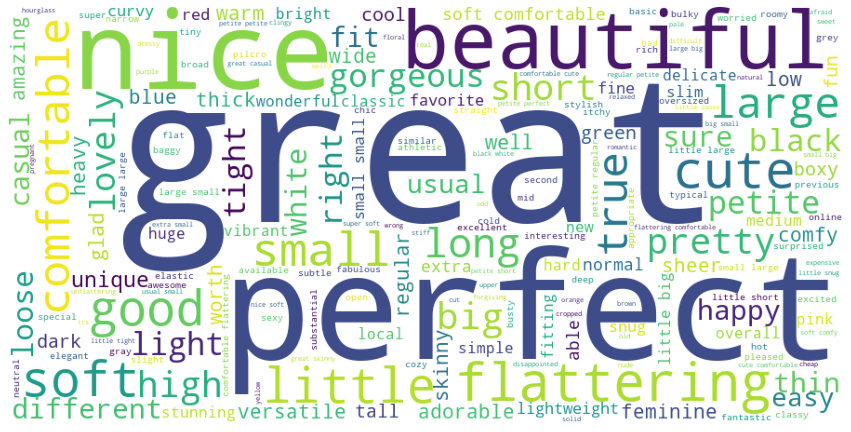

In [75]:
ver_wordcloud(todas_reviews_recom)

##### Abstracción
Para procesar los restantes dataframes, abstraemos todas las operaciones en dos funciones:

In [9]:
def adj_list(dataframe):
    todas_reviews = []
    for i in dataframe.index:
        review1 = dataframe.review_body[i] #seleccionar el titular
        sent = nlp(str(review1))
        # review1 = RegexpTokenizer('\w+').tokenize(review1) # Tokenizar con RegexpTokenizer
        for token in sent:            
            if (token.pos_ == "ADJ" and str(token) not in stopwords_spacy and len(token.text)>2):
                temp = token.lemma_
                todas_reviews.append(temp.lower()) #agregar el resultado a la lista
    return todas_reviews

def adj_frecquency_df(todas_reviews):
    # plain_todas_reviews = list(itertools.chain(*todas_reviews)) # Aplanar la lista
    freq_revs = nltk.FreqDist(todas_reviews) # Obtener frecuencia por palabra
    df_revs = pd.DataFrame(freq_revs.items(), columns = ['Palabra', 'Frecuencia']) # Crear nuevo df
    df_revs.sort_values(by=['Frecuencia'], inplace=True, ascending=False) # Ordenar valores por frecuencia
    df_revs.reset_index(drop = True, inplace=True) # Resetear index
    return df_revs

<span style='color:purple;'>**Analizamos las reviews "No recomendadas":**</span> <br>
(5 min)

In [77]:
# Listamos los adjetivos de las reviews no recomendadas
todas_reviews_not_recom = adj_list(data_not_recom)

In [78]:
df_rev_frec_not_recom = adj_frecquency_df(todas_reviews_not_recom)
df_rev_frec_not_recom

,Palabra,Frecuencia
0,small,955
1,large,641
2,short,584
3,cute,533
4,great,523
...,...,...
1433,ironic,1
1434,unbelievable,1
1435,xxxl,1
1436,armful,1


##### Visualizamos la frecuencia de las palabras en las reviews "No recomendadas"

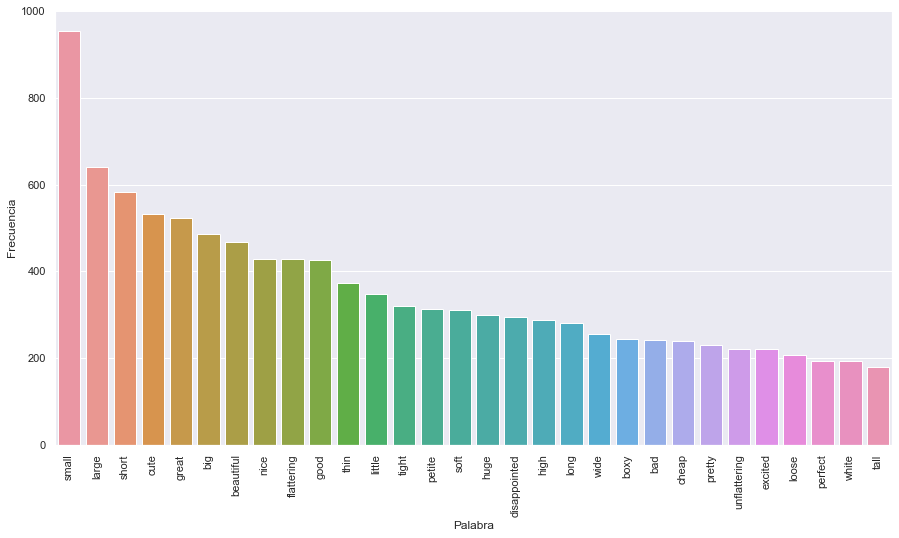

In [79]:
# Generamos gráfico con valores
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_not_recom.iloc[:30].Palabra, y = df_rev_frec_not_recom.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

*Palabras como 'great', 'cute' y 'beautiful' se repiten con las recomendadas pero tienen connotación negativa o deben estar acompañadas de una negación*.

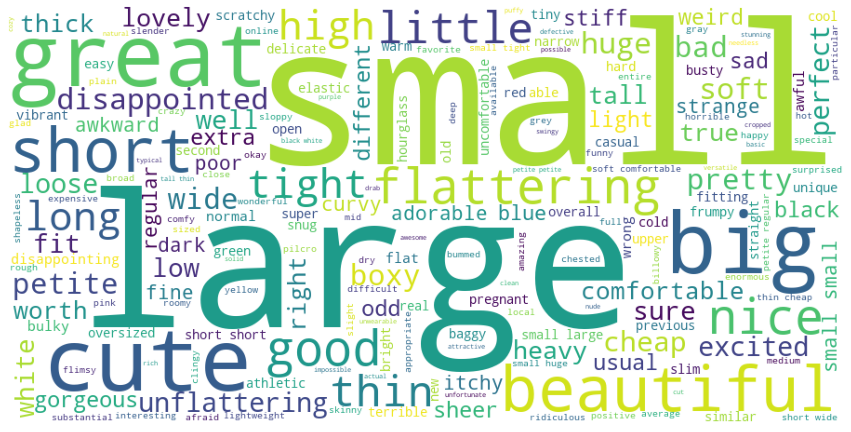

In [80]:
ver_wordcloud(todas_reviews_not_recom)

#### 12. ¿Qué palaras hacen la diferencia en las reseñas que son neutrales (rating = 3) y no recomiendan la prenda?

In [88]:
# Listamos los adjetivos de las reviews no recomendadas
reviews_3_not_recom = adj_list(data_not_recom[data_not_recom['rating'] == 3])
df_rev_frec_3_not_recom = adj_frecquency_df(reviews_3_not_recom)
df_rev_frec_3_not_recom

,Palabra,Frecuencia
0,small,388
1,large,285
2,short,262
3,great,244
4,cute,230
...,...,...
913,comments-,1
914,daily,1
915,peachy,1
916,extraordinary,1


##### Visualizamos la frecuencia de las palabras en las reviews de rating 3 y no recomendadas

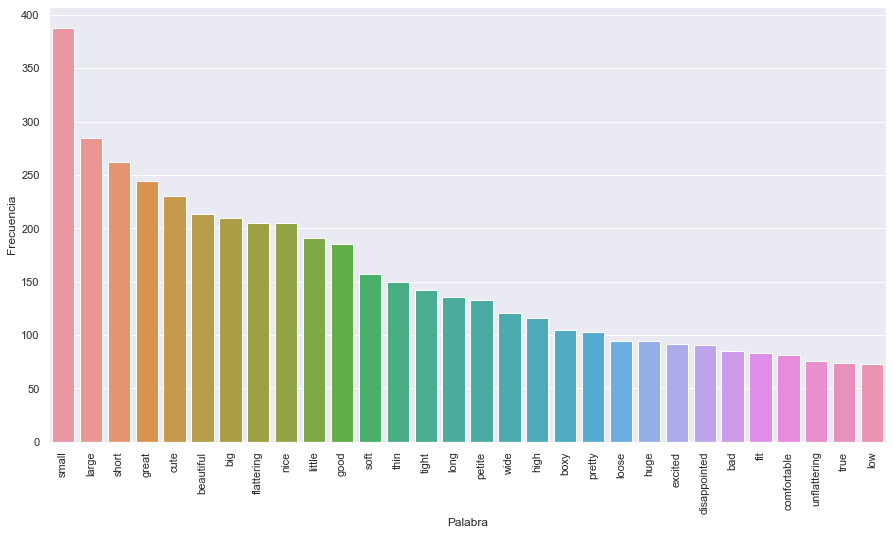

In [89]:
# Generamos gráfico con valores
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_rev_frec_3_not_recom.iloc[:30].Palabra, y = df_rev_frec_3_not_recom.iloc[:30].Frecuencia)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

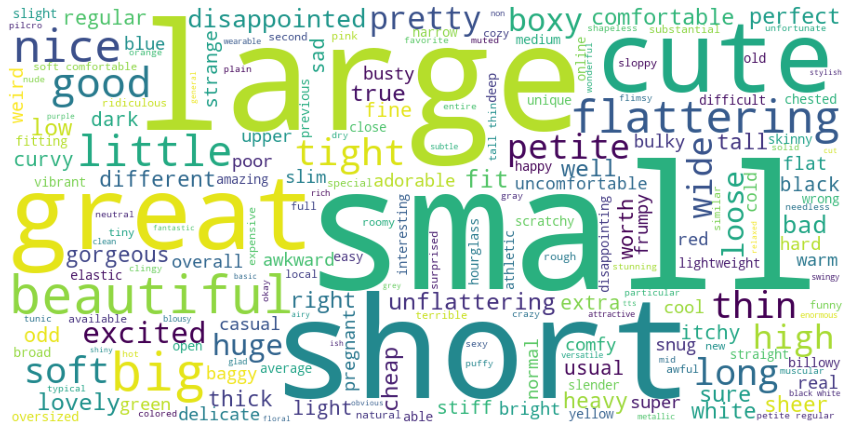

In [90]:
ver_wordcloud(reviews_3_not_recom)

*Hay una mezcla bastante pareja de las 2. Requerirá el análisis de otros factores.*

#### 13. ¿Hay reseñas de valoración alta (4-5) que no hayan recomendado la prenda? ¿Y valoraciones bajas (1-2) que sí recomienden?

In [53]:
df_12 = data[(data.rating <= 2)]
print('Cantidad de reseñas con baja valoración (1-2) que recomendaron el producto:',df_12[df_12.recommended == 1].shape[0])

Cantidad de reseñas con baja valoración (1-2) que recomendaron el producto: 109


In [54]:
df_45 = data[(data.rating >= 4)]
print('Reseñas con alta valoración (4-5) que no recomendaron el producto:',df_45[df_45.recommended == 0].shape[0])

Reseñas con alta valoración (4-5) que no recomendaron el producto: 187


In [55]:
df_3 = data[(data.rating == 3)]
print('Reseñas con valoración=3 que no recomendaron el producto:',df_3[df_3.recommended == 0].shape[0])
print('Reseñas con valoración=3 que recomendaron el producto:',df_3[df_3.recommended == 1].shape[0])

Reseñas con valoración=3 que no recomendaron el producto: 1653
Reseñas con valoración=3 que recomendaron el producto: 1170


In [91]:
# Liberamos espacio de memoria
del(data_grouped)
del(data_recom)
del(data_not_recom)
del(todas_reviews_not_recom)
del(reviews_3_not_recom)
del(todas_reviews_recom)
del(df_rev_frec_recom)
del(df_rev_frec_not_recom)
del(df_rev_frec_3_not_recom)
del(data)
gc.collect()

21995

### Trabajo con bigramas
En la parte de investigación del proyecto 3, se trató el tema del análisis de bigramas para evaluar si mejoraba el desempeño de los modelos predictivos, ya que se analiza una palabra junto con su contexto. Esot puede brindar más información a la hora de decidir a qué clase pertenece una reseña.

In [10]:
def listar_sust_adj(phrase):
    '''
    Función para generar bigramas por oración delimitada por puntos. 
    Considera ADJ/ADV + SUST/VERB que sean de más de 3 caracteres.
    
    Recibe una string y devuelve un listado de strings.
    '''
    sents = nltk.sent_tokenize(phrase.lower())
    adj_list = []
    sust_list = []
    sust_adj_list = []

    for oracion in sents:
        #print(oracion)
        doc = nlp(oracion) # create spacy object
        adj_list = []
        sust_list = []
        for item in doc:
            if (item.pos_ == "ADJ" or item.pos_ == "ADV") and len(item)>3: # separate nouns and not nouns
                adj_list.append(item.text)
            elif (item.pos_ == "NOUN" or item.pos_ == "VERB") and len(item)>3:
                sust_list.append(item.text)
        if(len(adj_list)!=0):
            for adj in adj_list:
                if(len(sust_list)!=0):
                    for sust in sust_list:
                        sust_adj_list.append(sust + " " + adj)
                else:
                    sust_adj_list.append(adj)
        elif(len(sust_list)!=0):
            for sust in sust_list:
                sust_adj_list.append(sust) 

    return sust_adj_list

In [19]:
# Miramos una clase de prenda al azar
rand_idx = np.random.randint(1,data.shape[0])
item = data.clothing_id.iloc[rand_idx]
item_data = data[data.clothing_id == item]
print("Tipo de la prenda:",  data.class_name.iloc[rand_idx])
print("Cantidad de reseñas de la prenda" + color.BOLD, item,color.END + ":", len(item_data))
print("Promedio de rating que ha recibido:" + color.YELLOW, item_data.rating.mean(),color.END)
item_data[['clothing_id','class_name','review_title','review_body','rating']].reset_index(drop = True, inplace=True)

Tipo de la prenda: Outerwear
Cantidad de reseñas de la prenda 1122 : 17
Promedio de rating que ha recibido: 3.6470588235294117 


In [22]:
# miramos una reseña al azar dentro de la clase
rand_idx_item = np.random.randint(0,item_data.shape[0])
print(color.BOLD + "Título:" + color.END,item_data.review_title.iloc[rand_idx_item])
print(color.BOLD + "Reseña:" + color.END,item_data.review_body.iloc[rand_idx_item])
print(color.BOLD + "Rating:" + color.END,item_data.rating.iloc[rand_idx_item])
if (item_data.recommended.iloc[rand_idx_item]):
    print(color.BOLD + "Categoría:" + color.END + "Recomendado")
else:
    print(color.BOLD + "Categoría:" + color.END + "No recomendado")

Título: Unflattering
Reseña: Even in my usual petite small size, this looked bulky and made me look stumpy. disappointing because the style looks so good in the picture and the material looks to be good quality. i don't even know if going down a size would have helped. as others have mentioned it looks like a frumpy house robe.
Rating: 2
Categoría:No recomendado


In [23]:
listar_sust_adj(item_data.review_title.iloc[rand_idx_item] +' '+item_data.review_body.iloc[rand_idx_item])

['unflattering even',
 'size even',
 'looked even',
 'made even',
 'look even',
 'unflattering usual',
 'size usual',
 'looked usual',
 'made usual',
 'look usual',
 'unflattering petite',
 'size petite',
 'looked petite',
 'made petite',
 'look petite',
 'unflattering small',
 'size small',
 'looked small',
 'made small',
 'look small',
 'unflattering bulky',
 'size bulky',
 'looked bulky',
 'made bulky',
 'look bulky',
 'unflattering stumpy',
 'size stumpy',
 'looked stumpy',
 'made stumpy',
 'look stumpy',
 'style disappointing',
 'looks disappointing',
 'picture disappointing',
 'material disappointing',
 'looks disappointing',
 'quality disappointing',
 'style good',
 'looks good',
 'picture good',
 'material good',
 'looks good',
 'quality good',
 'style good',
 'looks good',
 'picture good',
 'material good',
 'looks good',
 'quality good',
 'know even',
 'going even',
 'size even',
 'helped even',
 'others frumpy',
 'mentioned frumpy',
 'looks frumpy',
 'house frumpy',
 'robe f

## Preprocesamiento
### Importamos el dataset de entrenamiento
Importamos dataset que será utilizado para *train* y nos quedamos con las columnas relevantes.

<span style='color:red;'>**!! ACLARACIÓN:** En el notebook de <a href='https://github.com/lusalmeron/Acamica-DS-Proyecto-4/blob/main/Procesamiento_de_datasets.ipynb'>"Procesamiento_de_datasets"</a> se muestra el trabajo realizado para llegar a un único dataset filtrado por las columnas relevantes y que contengan también las lemmatizaciones y stemmizaciones de cada review concatenada a su título. **Ése es el set de datos que importamos para ahorrar tiempo de ejecución.**</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Garbage collector para optimizar recursos
import gc
# Clase para personalizar las impresiones de consola
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [2]:
import spacy # https://spacy.io/usage/models
nlp = spacy.load('en_core_web_md')

#Stop Words de en_core_news_md
from spacy.lang.en.stop_words import STOP_WORDS
stopwords_spacy = list(STOP_WORDS)

import nltk

#Stop Words de nltk
from nltk.corpus import stopwords
stopwords_nltk = set(stopwords.words('english'))

# Para manejo de resgitros de texto
import re
from nltk.tokenize import RegexpTokenizer

#Constante de signos de puntuación
import string
puntua = string.punctuation + '#...'
excluded_pos = ['SCONJ','CCONJ','NUM','PUNCT','PRON','DET','ADP','AUX','X','PROPN']

In [29]:
# Importamos dataset limpio
data = pd.read_csv("data/dataset_clothes_clean.csv")
print("- Cantidad de filas " + color.BOLD + "total" + color.END + " del set:", data.shape[0])
print("- Cantidad de filas " + color.BOLD + "nulas" + color.END + " por columna:")
data.isna().sum()

- Cantidad de filas total del set: 22628
- Cantidad de filas nulas por columna:


class_name      0
clothing_id     0
usr_age         0
review_title    0
review_body     0
rating          0
recommended     0
revs_lemma      0
revs_stem       0
dtype: int64

In [30]:
data.sample(5)

,class_name,clothing_id,usr_age,review_title,review_body,rating,recommended,revs_lemma,revs_stem
3079,Knits,862,40,So soft,So soft that i bought in 3 colors. i love wear...,5,1,soft soft buy color love wear comfortable tail...,soft soft bought color love wear comfort tailo...
5354,Knits,861,34,Great shirt,I love florals and this top can be worn with j...,5,1,great shirt love floral wear jean wear work co...,great shirt love floral worn jean worn work co...
17045,Fine gauge,895,56,Pretty and flowy,A successful first date sweater. the cut is fl...,4,1,pretty flowy successful date sweater cut flowy...,pretti flowi success date sweater cut flowi ex...
7034,Knits,862,60,-,Beautiful top. works wonderful on hourglass fi...,5,1,beautiful work wonderful hourglass figure,beauti work wonder hourglass figur
17575,Skirts,1007,43,-,Yikes. there is a whole lot of skirt here. i a...,1,0,yikes lot skirt weigh usually wear retailer cl...,yike lot skirt weigh usual wear retail cloth d...


### Tokenización 
Si bien el dataset ya está limpio, tomamos una review al azar y aplicamos funciones y objetos de la librería spaCy para explorarlos.

In [3]:
# Miramos una review al azar
random_index = np.random.randint(0,data.shape[0])
review = data.review_body.iloc[random_index]
title = data.review_title.iloc[random_index]
print(color.BOLD + '- ID:' + color.END, random_index,'\n' + color.BOLD + '- Título:' + color.END,title,'\n' + color.BOLD + '- Reseña:' + color.END, review)
print(color.BOLD + '- Valoración:' + color.END,data.rating[random_index])
if (data.recommended.iloc[random_index]):
    print(color.BOLD + "- Clase: " + color.END + "Recomendado")
else:
    print(color.BOLD + "- Clase: " + color.END + "No recomendado")
print(color.BOLD + '- Categoría:' + color.END, data.class_name[random_index])

- ID: 21618 
- Título: Huge 
- Reseña: I love baseball tees and this looked like a more refined version, but it was huge and shapeless.  nice material and fabric but this one is going back.
- Valoración: 2
- Clase: No recomendado
- Categoría: Knits


In [6]:
# Mostramos las POS de la review elegida
sent = nlp(review)
print("{0:20}{1:20}".format("PALABRA:","POS:"))
for token in sent:
    print("{0:20}{1:20}".format(token.text,token.pos_))

PALABRA:            POS:                
I                   PRON                
love                VERB                
baseball            NOUN                
tees                NOUN                
and                 CCONJ               
this                DET                 
looked              VERB                
like                ADP                 
a                   DET                 
more                ADV                 
refined             ADJ                 
version             NOUN                
,                   PUNCT               
but                 CCONJ               
it                  PRON                
was                 VERB                
huge                ADJ                 
and                 CCONJ               
shapeless           NOUN                
.                   PUNCT               
                    SPACE               
nice                ADJ                 
material            NOUN                
and             

In [7]:
# Visualización de los POS
from spacy import displacy
displacy.render(sent, style="dep")

### Lemmatizer
Analizamos esta función de la librería spaCy con la review al azar.

In [8]:
# Tokens lemmatizados de la review elegida
print("{0:20}{1:20}{2:20}".format("PALABRA:","POS:","LEMMA:"))
for token in sent:
    print("{0:20}{1:20}{2:20}".format(token.text,token.pos_,token.lemma_))

PALABRA:            POS:                LEMMA:              
I                   PRON                I                   
love                VERB                love                
baseball            NOUN                baseball            
tees                NOUN                tee                 
and                 CCONJ               and                 
this                DET                 this                
looked              VERB                look                
like                ADP                 like                
a                   DET                 a                   
more                ADV                 more                
refined             ADJ                 refined             
version             NOUN                version             
,                   PUNCT               ,                   
but                 CCONJ               but                 
it                  PRON                it                  
was                 VERB

In [9]:
#Función para limpieza de datos con lemmatizer
def text_data_lemma(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy and len(token.text)>2): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [10]:
# Lemmatizamos y filtramos la review escogida
print(color.BOLD + "[ REVIEW ORIGINAL ] :" + color.END, review)
clean_review = text_data_lemma(review)
clean_review = " ".join(clean_review)
print(color.BOLD + "\n[ REVIEW LEMMATIZADA ] :" + color.END, clean_review)

[ REVIEW ORIGINAL ] : I love baseball tees and this looked like a more refined version, but it was huge and shapeless.  nice material and fabric but this one is going back.

[ REVIEW LEMMATIZADA ] : love baseball tee look refined version huge shapeless nice material fabric go


### Stemmizer
Analizamos esta función de la librería spaCy con la review al azar.

In [11]:
# Importamos objeto de nltk que nos permite stemmizar en español
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [12]:
# Porbamos el stemmer en review al azar
sent = nlp(review)
print("{0:20}{1:20}{2:20}".format("PALABRA:","POS:","STEM:"))
for token in sent:
    print("{0:20}{1:20}{2:20}".format(token.text,token.pos_,stemmer.stem(token.text)))

PALABRA:            POS:                STEM:               
I                   PRON                I                   
love                VERB                love                
baseball            NOUN                basebal             
tees                NOUN                tee                 
and                 CCONJ               and                 
this                DET                 thi                 
looked              VERB                look                
like                ADP                 like                
a                   DET                 a                   
more                ADV                 more                
refined             ADJ                 refin               
version             NOUN                version             
,                   PUNCT               ,                   
but                 CCONJ               but                 
it                  PRON                it                  
was                 VERB

In [13]:
# Función para limpieza de datos con stemmer
def text_data_stem(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ not in excluded_pos and str(token) not in stopwords_spacy and len(token.text)>2): 
            temp = stemmer.stem(token.text).strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

In [14]:
# Filtramos y stemmizamos la review escogida
print(color.BOLD + "[ REVIEW ORIGINAL ] :" + color.END, review)
clean_review = text_data_stem(review)
clean_review = " ".join(clean_review)
print(color.BOLD + "\n[ REVIEW STEMMIZADA ] :" + color.END, clean_review)

[ REVIEW ORIGINAL ] : I love baseball tees and this looked like a more refined version, but it was huge and shapeless.  nice material and fabric but this one is going back.

[ REVIEW STEMMIZADA ] : love basebal tee look refin version huge shapeless nice materi fabric go


In [15]:
gc.collect()

184

<span style='color:blue;'> *Como el proceso de lemmatizar y stemmizar las reviews ya está hecho y agregado al dataset, pasamos a lo siguiente: la **vectorización**.*</span>

## Vectorización
### Importar y crear vectorizador

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
max_features=10000 # Determina máximo de palabras que toma para hacer la matriz
min_df = 0.0001 # Toma todas las palabras que tengan este mínimo de frecuencia
ngram_range = (2,2)

tfidf = TfidfVectorizer(max_features=max_features, min_df=min_df,ngram_range=ngram_range)

### Separamos datasets lemma y stem

In [50]:
# Columnas de interés del dataset LEMMA
data.loc[:,('class_name','usr_age','revs_lemma','rating','recommended')].head()

,class_name,usr_age,revs_lemma,rating,recommended
0,Intimates,33,absolutely wonderful silky sexy comfortable,4,1
1,Dresses,34,love dress sooo pretty happen find store glad ...,5,1
2,Dresses,60,major design flaw high hope dress want work in...,3,0
3,Pants,50,favorite buy love love love jumpsuit fun flirt...,5,1
4,Blouses,47,flattering shirt shirt flattering adjustable t...,5,1


In [56]:
# Columnas de interés del dataset STEM
data.loc[:,('class_name','usr_age','revs_stem','rating','recommended')].head()

,class_name,usr_age,revs_stem,rating,recommended
0,Intimates,33,absolut wonder silki sexi comfort,4,1
1,Dresses,34,love dress sooo pretti happen find store glad ...,5,1
2,Dresses,60,major design flaw high hope dress want work in...,3,0
3,Pants,50,favorit buy love love love jumpsuit fun flirti...,5,1
4,Blouses,47,flatter shirt shirt flatter adjust tie perfect...,5,1


Probamos primero con las reviews **lemmatizadas**, pero bien podría cambiarse por las **stemmizadas** comentando y descomentando líneas.

En primera instancia, entrenamos el modelo con sólo las reseñas, pero podría probarse agregar otros atributos si mejora el desempeño.

In [32]:
## LEMMA
list_revs = list(data[('revs_lemma')].values)
recom = data['recommended'].values

## STEM
# list_revs = list(data['revs_stem'].values)
# recom = data['recommended'].values

list_revs[:5]

['absolutely wonderful silky sexy comfortable',
 'love dress sooo pretty happen find store glad order online petite buy petite love length me- hit little knee definitely true midi truly petite',
 'major design flaw high hope dress want work initially order petite small usual size find outrageously small small fact zip reorder petite medium overall half comfortable fit nicely half tight layer somewhat cheap net layer imo major design flaw net layer sew directly zipper',
 'favorite buy love love love jumpsuit fun flirty fabulous time wear great compliment',
 'flattering shirt shirt flattering adjustable tie perfect length wear legging sleeveless pair cardigan love shirt']

### Train-Test split de los datos
Usaremos el 70% para entrenamiento y el 30% para prueba. Luego vectorizaremos cada set por separado para evitar *data leaks*.

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(list_revs,recom,test_size=0.3,random_state=42,stratify=recom)
print("- Tamaño del set de " + color.CYAN + "entrenamiento:" + color.BOLD, len(X_train), color.END)
print("- Tamaño del set de " + color.GREEN + "prueba:" + color.BOLD, len(X_test),color.END)
print("- Algunos " + color.BOLD + "ejemplos" + color.END + " del set de entrenamiento:")
X_train[:5]

- Tamaño del set de entrenamiento: 15839 
- Tamaño del set de prueba: 6789 
- Algunos ejemplos del set de entrenamiento:


['love unusual print cut work get round sway dress look twice big actually shaping help adjust curve sad',
 'love love love dress absolutely layered cloud material amazingly soft comfy',
 'fit perfect sleeve little tight uncomfortably wish little room look picture love shirt super cute comfy get compliment',
 'comfy cute grab pair pant sale glad material soft lightweight-- ideal summer fit loose true size standard pair pant',
 'gorgeous comfy barely rarely find maxi far long extreme prefer barely reach ground oppose rise inch floor example perfect flat sandal try chuckle long try perfect length bodice fit glove average bust size fluctuate generally flat chested prefer conservative sleeveless dress']

### Generación de la matriz

In [76]:
# Ajustamos el vectorizador y transformamos los datos de entrenamiento
matriz_train = tfidf.fit_transform(X_train)
matriz_train

<15839x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 180544 stored elements in Compressed Sparse Row format>

In [77]:
# Vemos las palabras utilizadas (ordenadas alfabéticamente)
all_words = tfidf.get_feature_names()
print("Palabras más usadas:",all_words[:250])

Palabras más usadas: ['30dd chest', '30dd waist', '32c get', '34b fit', '34b waist', '34c curvy', '34c fit', '34c order', '34c size', '34c small', '34c waist', '34d chest', '34d size', '36c broad', '36c hourglass', '5ft2 waist', 'able away', 'able button', 'able dress', 'able find', 'able fit', 'able order', 'able pull', 'able purchase', 'able size', 'able snag', 'able try', 'able tuck', 'able wear', 'absolute favorite', 'absolutely adorable', 'absolutely adore', 'absolutely beautiful', 'absolutely fabulous', 'absolutely fall', 'absolutely gorgeous', 'absolutely love', 'absolutely lovely', 'absolutely perfect', 'absolutely recommend', 'absolutely stunning', 'accentuate curve', 'accentuate hip', 'accentuate waist', 'accommodate bust', 'actually buy', 'actually feel', 'actually fit', 'actually go', 'actually like', 'actually long', 'actually look', 'actually love', 'actually think', 'actually wear', 'actually work', 'add belt', 'add bit', 'add bonus', 'add bulk', 'add color', 'add detail

In [78]:
# Transformamos los datos de prueba en base al vectorizador ya entrenado
matriz_test = tfidf.transform(X_test)
matriz_test

<6789x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 72633 stored elements in Compressed Sparse Row format>

## Modelización

In [39]:
# Importamos modelos
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [79]:
xtrain = matriz_train.toarray()
xtest = matriz_test.toarray()

# Para la validación cruzada neceitamos el set entero
X = tfidf.transform(list_revs)
X = X.toarray()
y = recom

#### Métricas de evluación

In [41]:
from sklearn.metrics import classification_report # Para un reporte con precision, recall y f1_score
from sklearn.metrics import accuracy_score

Vamos a utilizar el **accuracy score** para evaluar en general la precisión del multiclasificador, ya que genera un promedio entre todas las clases (que en nuestro dataset están balancedas en cantidad) y hace un ajuste entre *precisión* y *recall*. 

Como complemento, utilizaremos el **Calssification report** para ver cómo varían la precisión y el recall por clase.

También elaboramos función para visualizar la **matriz de confusión** de cada modelo.

In [42]:
from sklearn.metrics import confusion_matrix

def confusion(ytest,y_pred):
    names=["No Recomendado","Recomendado"]
    cm=confusion_matrix(ytest,y_pred)
    f,ax=plt.subplots(figsize=(7,7))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

### Validación cruzada

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

def k_validacion_cruzada(model,x,y,k):
    scores = cross_val_score(model, x, y, cv=k)
    print("%0.2f de precisión con desviación estándar de %0.2f" % (scores.mean(), scores.std()))

### Naive Bayes - Modelo Benchmark

In [80]:
nb = GaussianNB()
nb.fit(xtrain,ytrain)

y_pred = nb.predict(xtest)
print(color.BOLD + 'Accuracy : ' + color.END, accuracy_score(ytest,y_pred))

Accuracy :  0.7207247017233761


In [81]:
print(color.BOLD + 'Validación cruzada:' + color.END)
k_validacion_cruzada(nb,X,recom,5)

Validación cruzada:
0.73 de precisión con desviación estándar de 0.01


In [82]:
print(color.BOLD + 'Reporte de clasificación : '+ color.END + '\n \n' ,classification_report(ytest, y_pred, target_names=['No Rec','Rec']))

Reporte de clasificación : 
 
               precision    recall  f1-score   support

      No Rec       0.33      0.55      0.41      1230
         Rec       0.88      0.76      0.82      5559

    accuracy                           0.72      6789
   macro avg       0.61      0.65      0.62      6789
weighted avg       0.78      0.72      0.74      6789



*Las métricas del reporte se ven explicadas en la matriz de confusión.*

**Accuracy:** De todos los predichos de una clase, qué porcentaje realmente pertenece a ella.<br>
**Recall:** De todos los que son de una clase, qué porcentaje predijo correctamente.

Matriz de confusión : 


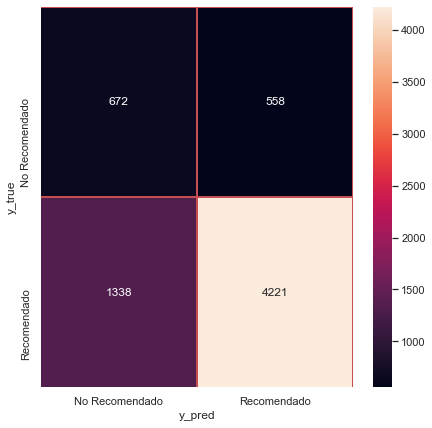

In [83]:
print(color.BOLD + 'Matriz de confusión : '+ color.END)
confusion(ytest,y_pred)

*Vemos que los mayores aciertos están en las de 1 y 5 estrellas. Aún así, existen bastantes de 5 estrellas que predijo como de 1. Esto podría deberse a que usan palabras parecidas, tanto para hablar positivamente como diciendo que "no" son así.*

*También vemos que hay gran confusión también entre los de 4 y 5 estrellas y los de 1 y 2 estrellas. Es entendible porque hay mucho parecido entre ellas.*

*Finalmente, el de 3 estrellas es el que más fácilmente se confunde con los demás ya que es la media y tiene palabras que se repiten en todas las reseñas.*

### Random Forest

In [84]:
rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

y_pred = rf.predict(xtest)
print(color.BOLD + 'Accuracy : ' + color.END, accuracy_score(ytest, y_pred))

Accuracy :  0.855796140816026


In [88]:
print(color.BOLD + 'Validación cruzada:' + color.END)
#k_validacion_cruzada(rf,X,recom,3)

Validación cruzada:


In [86]:
print(color.BOLD + 'Reporte de clasificación : '+ color.END + '\n \n' ,classification_report(ytest, y_pred, target_names=['No Rec','Rec']))

Reporte de clasificación : 
 
               precision    recall  f1-score   support

      No Rec       0.65      0.43      0.52      1230
         Rec       0.88      0.95      0.92      5559

    accuracy                           0.86      6789
   macro avg       0.77      0.69      0.72      6789
weighted avg       0.84      0.86      0.84      6789



*Las métricas del reporte se ven explicadas en la matriz de confusión.*

Matriz de confusión : 


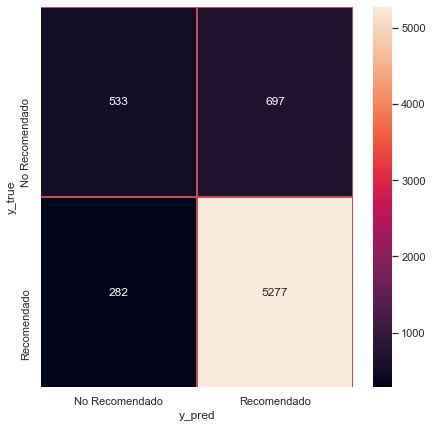

In [87]:
print(color.BOLD + 'Matriz de confusión : '+ color.END)
confusion(ytest,y_pred)

*Se nota una mejora ocnsiderable en la identificación de cada clase, e incluso se redujo en un buen porcentaje la confusión entre los extremos 1-2 y 4-5.*

*También mejoró la distinción entre 5 y 1, lo mismo que se ajustó la predicción de los 3: ya no hay tanta confusión con las demás clases.*

#### Feature importances
Algo muy bueno de Random Forest es que puede indicar la importancia de los features que se usan para clasificar. Veamos en este caso cuáles son las palabras que mayormente determinan el el valor de una review para este clasificador.

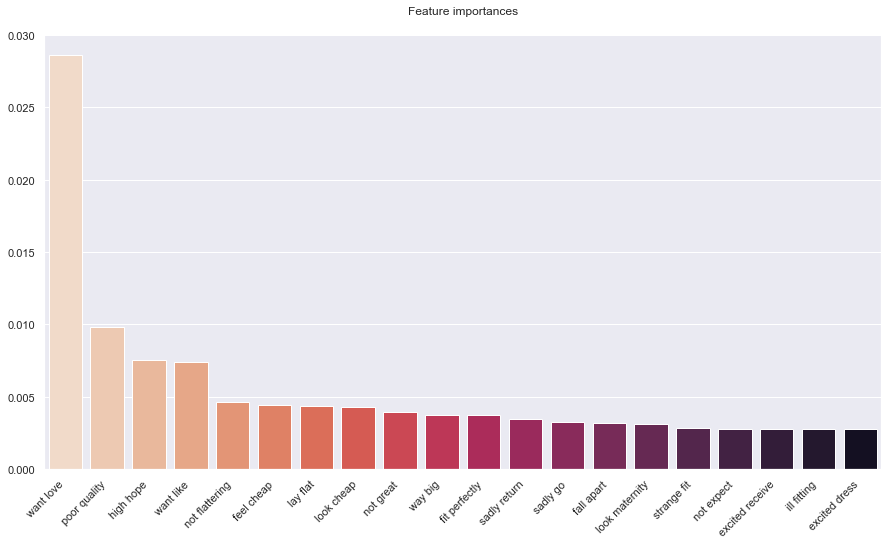

In [89]:
# Le preguntamos la importancia de cada feature (cada palabra)
importances = rf.feature_importances_
# Tomamos la lista de palabras
all_words = tfidf.get_feature_names()
columns = all_words

# Ordenamos por importnacia y tomamos las 20 primeras
indices = np.argsort(importances)[::-1]
indices = indices[:20]
selected_columns = [columns[i] for i in indices] # 
selected_importances = importances[indices] # 

# Por ultimo graficamos
plt.figure(figsize = (15,8))
plt.title(label='Feature importances',pad=20)
grafico = sns.barplot(x=selected_columns, y=selected_importances,palette='rocket_r')
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha="right")
plt.show()

### SVM

In [90]:
# En vez de utilizar SVC, vamos a usar LinearSVC, 
# ya que para el Kernel Lineal esta función es MUCHO mas rapida que la tradicional SVC.

svc = LinearSVC(C = 1)
svc.fit(xtrain,ytrain)

y_pred = svc.predict(xtest)
print(color.BOLD + 'Accuracy : ' + color.END, accuracy_score(ytest, y_pred))

Accuracy :  0.8587420827809692


In [91]:
print(color.BOLD + 'Validación cruzada:' + color.END)
k_validacion_cruzada(svc,X,recom,5)

Validación cruzada:
0.86 de precisión con desviación estándar de 0.00


In [92]:
print(color.BOLD + 'Reporte de clasificación : '+ color.END + '\n \n' ,classification_report(ytest, y_pred, target_names=['No Rec','Rec']))

Reporte de clasificación : 
 
               precision    recall  f1-score   support

      No Rec       0.65      0.47      0.54      1230
         Rec       0.89      0.95      0.92      5559

    accuracy                           0.86      6789
   macro avg       0.77      0.71      0.73      6789
weighted avg       0.85      0.86      0.85      6789



*Las métricas del reporte se ven explicadas en la matriz de confusión.*

Matriz de confusión : 


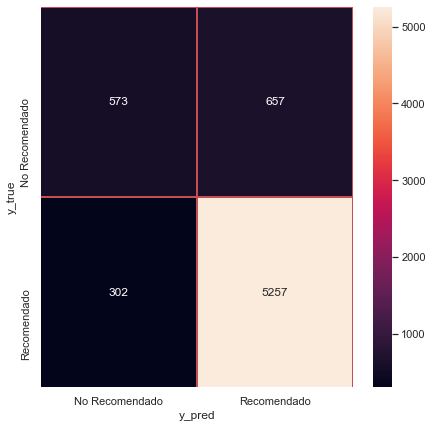

In [93]:
print(color.BOLD + 'Matriz de confusión : '+ color.END)
confusion(ytest,y_pred)

*Si bien mejora considerablemente la predicción en los extremos, empeora respecto del random forest en las predicciones de la clase de 3 estrellas. En los casos de las falsas predicciones de 1 y 5 para reviews que son de 3 puede suponerse que es porque son ambiguas y no logra identificar a cuál extremo pertenecen, por lo que les asigna un punto medio.*

### Comparación modelos `Lemma` vs `Stem`

- El benchmark con el dataset lemmatizado tiene casi el mismo rendimiento con las clases 1 y 5 que el SVM Lineal con el dataset stemmizado. Pero en las clases intermedias lo supera ampliamente este último.
- Random Forest es apenas más preciso con el dataset stemmizado que con el lemmatizado. Sin embargo, empeora su recall.
- El SVC, en ambos casos, es el que tiene el mejor rendimiento. Pero analizando en profundidad, el SVC con el dataset stem tiene mejor precisión y recall en todas las clases.

La comparación más extensiva está en este documento: <https://github.com/lusalmeron/Proyecto-3-NLP/blob/main/Comparacion_lemma_stem_v2.pdf>

### Conclusión: SVC con dataset stem
Por su rendimiento general y en cada clase en partiuclar, buscaremos optimizar este modelo para aumentar su accuracy.

## Optimización de hiperparámetros del SVC
Para encontrar los valores que maximizan el rendimiento del modelo, vamos a realizar la optimización tanto del SVC como del Vectorizador, ya que las palabras utilizadas para la clasificación influyen en el desempeño del modelo.

Para el vectorizador utilizaremos la **estartegia manual** para encontrar el mínimo valor de frecuencia de palabras (`max_df`) que filtre a las que serán utilizadas para la vectorización.

En cambio, para optimizar el modelo utilizaremos **Grid Search** y encontraremos los valores de `C` y el `kernel` que maximicen su accuracy.

### Búsqueda manual
#### Vectorizer

In [123]:
scores_train = []
scores_test = []
max_features = 15000
list_min_df = [0.00001,0.0001,0.0005,0.001,0.01]
svc = LinearSVC(C = 1)

for value in list_min_df:
    tfidfop = TfidfVectorizer(max_features=max_features, min_df=value)
    mxtrain = tfidfop.fit_transform(X_train)
    mxtest = tfidfop.transform(X_test)
    
    xtrain = mxtrain.toarray()
    xtest = mxtest.toarray()
    
    svc.fit(xtrain,ytrain)
    
    y_pred_train = svc.predict(xtrain)
    y_pred_test = svc.predict(xtest)
    
    scores_train.append(accuracy_score(ytrain, y_pred_train))
    scores_test.append(accuracy_score(ytest, y_pred_test))

scores_train = np.array(scores_train)
scores_test = np.array(scores_test)

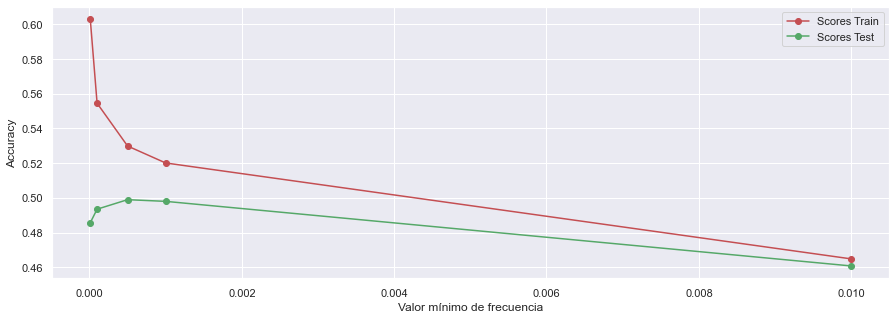

In [124]:
plt.figure(figsize=(15,5))
plt.plot(list_min_df,scores_train,'o-', label = 'Scores Train', c='r')
plt.plot(list_min_df,scores_test,'o-', label = 'Scores Test', c='g')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Valor mínimo de frecuencia')
plt.show()

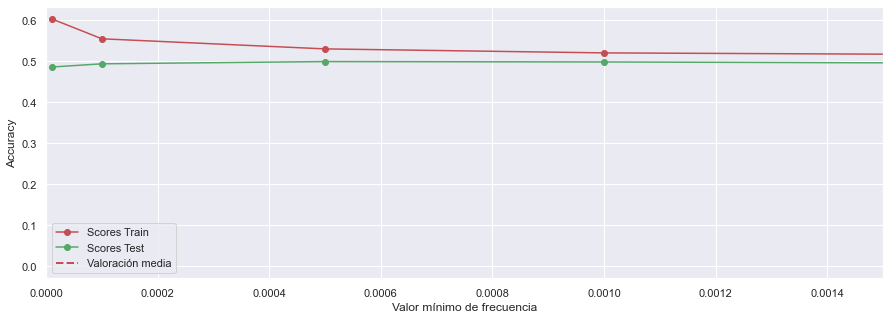

In [126]:
#cte = np.ones(max(scores_train))
plt.figure(figsize=(15,5))
plt.plot(list_min_df,scores_train,'o-', label = 'Scores Train', c='r')
plt.plot(list_min_df,scores_test,'o-', label = 'Scores Test', c='g')
plt.plot(0.001, ls = '--', lw = 2, c='r',label = 'Valoración media')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Valor mínimo de frecuencia')
plt.xlim(0,0.0015)
plt.show()

Haciendo *zoom* en la zona que tiene mayor accuracy en el conjunto de test vemos que fue obtenido con el valor `min_df = 0.001`. Además, es el que menos separado está del accuracy del conjunto de train. Por tanto, éste es el valor óptimo.

Ahora pasamos a optimizar los hiperparámetros del modelo SVC Lineal utilizando el método de Grid Search.

In [151]:
del(mxtrain)
del(mxtest)
del(xtrain)
del(xtest)
del(y_pred_train)
del(y_pred_test)
gc.collect()

23113

### Grid Search
- Pueden ver las búsquedas realizadas y su evaluación en el documento de git: <https://github.com/lusalmeron/Proyecto-3-NLP/blob/main/GridSearchResults.pdf>
#### Optimización del modelo SVC

In [163]:
# Grilla para Grid Search
# param_grid = {'C':[1,1.5,2,2.5,3]}
param_grid = {'C':[0.01,0.1,1,1.1]}

# Grid Search
from sklearn.model_selection import GridSearchCV
svcgs = LinearSVC()
model = GridSearchCV(svcgs, param_grid=param_grid)

In [164]:
# Vectorizador optimizado
tfidfop = TfidfVectorizer(max_features=15000, min_df=0.001)
mxtrain = tfidfop.fit_transform(X_train)
mxtest = tfidfop.transform(X_test)

xtrain = mxtrain.toarray()
xtest = mxtest.toarray()
mxtrain

<147000x1477 sparse matrix of type '<class 'numpy.float64'>'
	with 1398530 stored elements in Compressed Sparse Row format>

In [165]:
# Entrenamiento
model.fit(xtrain, ytrain)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.01, 0.1, 1, 1.1]})

In [166]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores

Mejores parametros: {'C': 0.01}
Mejor Score: 0.49779591836734693



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,3.559744,0.072188,0.102507,0.006092,0.01,{'C': 0.01},0.499660,0.498367,0.497347,0.494082,0.499524,0.497796,0.002039,1
1,3.937335,0.183647,0.097143,0.005267,0.10,{'C': 0.1},0.497279,0.498265,0.496293,0.493980,0.498095,0.496782,0.001566,2
2,9.155562,0.020803,0.101543,0.006971,1,{'C': 1},0.494966,0.496429,0.493776,0.493061,0.496259,0.494898,0.001329,4
3,9.753392,0.029683,0.094146,0.001470,1.10,{'C': 1.1},0.495034,0.496497,0.493776,0.493061,0.496259,0.494925,0.001346,3


### Evaluación del modelo optimizado
Los datos se vectorizan con el tfidf con un `mìn_df = 0.001` y `max_features = 15000`.<br>
Luego se entrena un modelo `LinearSVC`con `C = 0.1`.

In [168]:
svcop = LinearSVC(C=0.01)
svcop.fit(xtrain,ytrain)

y_pred = svcop.predict(xtest)
print(color.BOLD + 'Accuracy : ' + color.END + color.YELLOW, accuracy_score(ytest, y_pred), color.END)

Accuracy :  0.4996507936507936 


In [169]:
print(color.BOLD + 'Reporte de clasificación : '+ color.END + '\n \n' ,classification_report(ytest, y_pred, target_names=['1','2','3','4','5']))

Reporte de clasificación : 
 
               precision    recall  f1-score   support

           1       0.57      0.74      0.64     12600
           2       0.42      0.38      0.40     12600
           3       0.41      0.32      0.36     12600
           4       0.45      0.36      0.40     12600
           5       0.57      0.70      0.63     12600

    accuracy                           0.50     63000
   macro avg       0.48      0.50      0.49     63000
weighted avg       0.48      0.50      0.49     63000



Matriz de confusión : 


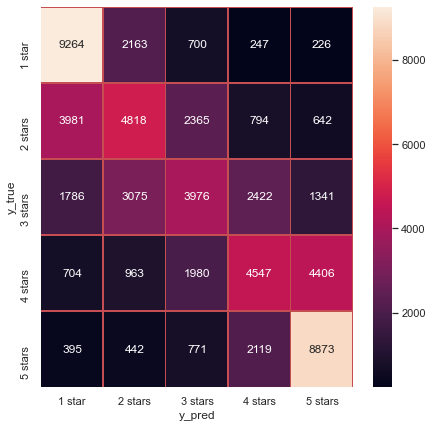

In [170]:
print(color.BOLD + 'Matriz de confusión : '+ color.END)
confusion(ytest,y_pred)

## Conclusión de la optimización
Lo mejor que se pudo obtener con los hiperparámetros óptimos establecidos es una **precisión del 50%**.
Si bien este valor es relativamente bajo, está al límite del rendimiento aceptable, ya que acertará en la mitad de las predicciones de cada clase.

Como vemos en el informe y en la matriz de confusión, los más fáciles de identificar son las clases extremos y los más conflictivos son el 2 y el 4, ya que se los confunde en gran cantidad de casos con el 1 y el 5, respectivamente.

En cuanto a la clase 3, tiene el accuracy más bajo pero es el mejor rendimiento comparado con los otros modelos en esa clase.

In [176]:
# Liberamos espacio en memoria
del(data)
gc.collect()

5677

# Investigación
Como líneas futuras de investigación, para aumentar el rendimiento del modelo, me gustaría:

1. Poder **involucrar las categorías de los productos** para entrenar los modelos, ya que puede haber palabras que tengan más relevancia en una categoría que en otras.
2. Explorar ***[n-gramas](http://www.nltk.org/api/nltk.html?highlight=ngram)* de palabras** para entrenar. Como vimos en las nubes de palabras, las más frecuentes en las clases de 1 y 5 estrellas son parecidas ('bueno', 'perfecto', 'grande', 'recomendable') pero analizar en qué contexto se escriben dichas palabras (las palabras que la acompañan) puede darnos mucha información sobre sis e usa negativa o positivamente. Creo que podría ser muy provechoso para el proyecto.
3. Explorar **pipelines de trabajo** para automatizar los procesos vectorización y entrenamiento. Por las características de la PC que estoy utilizando no me fue podible realizar esto en simultáneo ya que consumía demasiados recursos. Pero con alguna tecnología en la nube o una mejor máquina podría implementarse.
4. Formas de realizar una **limpieza más exahustiva de los datos**, ya que existen casos donde quedaron emojis intercalados con el texto o palabras mal escritas que confunden al modelo e incluso son interpretadas con un diferente POS.

### Si puediera rehacer algo...
#### A- Entrenaría y optimizaría el *random forest stemmizado*
Ya que si bien tiene menor accuracy que el SVM lemma, estaba más equilibrado en cuanto a *precisión* y *recall*.

In [171]:
# Vectorizador optimizado
tfidfop = TfidfVectorizer(max_features=15000, min_df=0.001)
mxtrain = tfidfop.fit_transform(X_train)
mxtest = tfidfop.transform(X_test)

xtrain = mxtrain.toarray()
xtest = mxtest.toarray()

rf = RandomForestClassifier()
rf.fit(xtrain,ytrain)

y_pred = rf.predict(xtest)
print(color.BOLD + 'Accuracy : ' + color.END + color.YELLOW, accuracy_score(ytest, y_pred), color.END)

Accuracy :  0.4801746031746032 


*Como vemos, habiendo optimizado el vectorizador ya mejora el rendimiento del Random forest haciéndolo pasar de 0.44 de accuracy a **0.48**. Si se hiciera una optimización de hiperparámetros de este modelo, siendo que tiene más parámetros que el SVC, entonces estimo que podríamos incluso superar los 0.499 de precición del SVC.*

#### B- Probaría usar sólo adjetivos, a ver si mejora el desempeño

In [241]:
# Importamos dataset limpio
data = pd.read_json("dataset_amazon_clean.json", lines = False)
data.head()

,product_category,review_title,review_body,stars,revs_lemma,revs_stem
0,wireless,Mala compra,"Malisimo, muy grande demasiado aparatoso y mal...",1,malo compro malisimo grande aparatoso protecto...,mal compr malisim grand aparat protector pantall
1,apparel,No lo he recibido,No he recibido el pedido no la devolución,1,recibir recibir pedido devolución,recib recib ped devolu
2,sports,Que no aprieta bien en el manillar,"Tengo que buscar otro sistema, este no funcion...",1,apretar manillar tener buscar sistema funciona...,apriet manill teng busc sistem funcion abrazad...
3,home_improvement,Brocas de mantequilla,Utilicé las brocas de menor diámetro y se me d...,1,brocas mantequilla utilicé broca menor diámetr...,broc mantequill utilic broc menor diametr dobl...
4,beauty,No me gusta,No me gusta su olor a viejo y aspecto malo,1,gustar gustar olor viejo aspecto malo,gust gust olor viej aspect mal


Analizamos las 10 primeras filas del dataset filtradas por sus adjetivos:

In [245]:
def text_data_lemma(sentence):
    doc = nlp(sentence)
    
    clean_tokens = []
    for token in doc:
        if (token.pos_ == 'ADJ' and str(token) not in stopwords_spacy and len(token.text)>2): 
            temp = token.lemma_.strip()
            clean_tokens.append(temp.lower())
    
    return clean_tokens

# Limpiamos todas las reviews con lemmatizer
adjs_lemma = []
for i in np.arange(0,11):
    rev = text_data_lemma(data.review_title.iloc[i] + ' ' + data.review_body.iloc[i])
    adjs_lemma.append(" ".join(rev))
adjs_lemma[:10]

['malo compro grande aparatoso',
 '',
 '',
 'menor mínimo doblado amarillo gris',
 'viejo malo',
 'roto roto',
 'imagino aleatorio cesta único',
 'bajo',
 'entregado',
 '']

In [183]:
data.review_body.iloc[:5]

0    Malisimo, muy grande demasiado aparatoso y mal...
1            No he recibido el pedido no la devolución
2    Tengo que buscar otro sistema, este no funcion...
3    Utilicé las brocas de menor diámetro y se me d...
4           No me gusta su olor a viejo y aspecto malo
Name: review_body, dtype: object

Como **puede pasar que haya reseñas sin adjetivos** (ver ejemplo arriba), debemos buscar otra alternativa.

#### C- Se podría probar con ngramas de adjetivos y sustantivos
Aunque esto tal vez convenga suvdividirlo por ctaegoría para alivianar los recursos durante el entrenamiento.

Hacemos la prueba con una review al azar:

In [184]:
# Miramos una review al azar
random_index = np.random.randint(0,data.shape[0])
review = data.review_body.iloc[random_index]
title = data.review_title.iloc[random_index]
print(color.BOLD + '- ID:' + color.END, random_index,'\n' + color.BOLD + '- Título:' + color.END,title,'\n' + color.BOLD + '- Reseña:' + color.END, review)
print(color.BOLD + '- Valoración:' + color.END,data.stars[random_index])
print(color.BOLD + '- Categoría:' + color.END, data.product_category[random_index])

- ID: 129629 
- Título: Muy buena relación calidad precio 
- Reseña: Ya he comprado dos, para mis hijos. Lo mejor sus 2 gb de capacidad para sus juegos y aplicaciones. Tamaño justo para ellos. Navega muy bien. Muy Recomendable.
- Valoración: 4
- Categoría: pc


In [239]:
def listar_sust_adj(phrase):
    '''
    Función para generar bigramas por oración delimitada por puntos. 
    Considera ADJ/ADV + SUST/VERB que sean de más de 3 caracteres.
    '''
    sents = nltk.sent_tokenize(phrase.lower())
    adj_list = []
    sust_list = []
    sust_adj_list = []

    for oracion in sents:
        #print(oracion)
        doc = nlp(oracion) # create spacy object
        adj_list = []
        sust_list = []
        for item in doc:
            if (item.pos_ == "ADJ" or item.pos_ == "ADV") and len(item)>3: # separate nouns and not nouns
                adj_list.append(item.text)
            elif (item.pos_ == "NOUN" or item.pos_ == "VERB") and len(item)>3:
                sust_list.append(item.text)
        if(len(adj_list)!=0):
            for adj in adj_list:
                if(len(sust_list)!=0):
                    for sust in sust_list:
                        sust_adj_list.append(sust + " " + adj)
                else:
                    sust_adj_list.append(adj)
        elif(len(sust_list)!=0):
            for sust in sust_list:
                sust_adj_list.append(sust) 

    return sust_adj_list

In [240]:
listar_sust_adj(review)

['comprado',
 'hijos',
 'capacidad mejor',
 'juegos mejor',
 'aplicaciones mejor',
 'tamaño justo',
 'navega bien',
 'recomendable']